# Week 3 A
### Name: Jay Zhang

To solve the question: "What's the relationship between the PTEN gene and Endometrioid  Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Endometrioid_Cancer_(UCEC)/TCGA.UCEC.sampleMap_UCEC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Endometrioid_Cancer_(UCEC)/TCGA.UCEC.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [3]:
# Display clinical dataset
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_DNAMethyl_UCEC,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_UCEC,...,_GENOMIC_ID_TCGA_UCEC_miRNA_HiSeq,_GENOMIC_ID_TCGA_UCEC_exp_GAV2,_GENOMIC_ID_TCGA_UCEC_gistic2thd,_GENOMIC_ID_TCGA_UCEC_G4502A_07_3,_GENOMIC_ID_TCGA_UCEC_gistic2,_GENOMIC_ID_data/public/TCGA/UCEC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_UCEC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_UCEC_hMethyl450,_GENOMIC_ID_TCGA_UCEC_hMethyl27,_GENOMIC_ID_TCGA_UCEC_exp_GAV2_exon
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,Indeterminate,TCGA-2E-A9G8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-2E-A9G8-01,NaN,TCGA-2E-A9G8-01A-11D-A402-01,NaN,TCGA-2E-A9G8-01A-11D-A402-01,TCGA-2E-A9G8-01,TCGA-2E-A9G8-01,TCGA-2E-A9G8-01A-11D-A409-05,NaN,NaN
TCGA-4E-A92E-01,MSS,TCGA-4E-A92E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-4E-A92E-01,NaN,TCGA-4E-A92E-01A-11D-A37M-01,NaN,TCGA-4E-A92E-01A-11D-A37M-01,TCGA-4E-A92E-01,TCGA-4E-A92E-01,TCGA-4E-A92E-01A-11D-A37Q-05,NaN,NaN
TCGA-5B-A90C-01,MSS,TCGA-5B-A90C-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-5B-A90C-01,NaN,TCGA-5B-A90C-01A-11D-A37M-01,NaN,TCGA-5B-A90C-01A-11D-A37M-01,TCGA-5B-A90C-01,TCGA-5B-A90C-01,TCGA-5B-A90C-01A-11D-A37Q-05,NaN,NaN
TCGA-5S-A9Q8-01,MSS,TCGA-5S-A9Q8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-5S-A9Q8-01,NaN,TCGA-5S-A9Q8-01A-11D-A402-01,NaN,TCGA-5S-A9Q8-01A-11D-A402-01,TCGA-5S-A9Q8-01,TCGA-5S-A9Q8-01,TCGA-5S-A9Q8-01A-11D-A409-05,NaN,NaN
TCGA-A5-A0G1-01,MSI-H,TCGA-A5-A0G1-01,Quiet,C6-UCEC,UCEC non-CIMP c3,cluster 4,UCEC-like c5,UCEC-like c11,miRNA cluster 14,cluster 2,...,TCGA-A5-A0G1-01,c4bc1759-7de2-427c-a936-431f343ea929,TCGA-A5-A0G1-01A-11D-A120-01,NaN,TCGA-A5-A0G1-01A-11D-A120-01,TCGA-A5-A0G1-01,TCGA-A5-A0G1-01,TCGA-A5-A0G1-01A-11D-A123-05,NaN,c4bc1759-7de2-427c-a936-431f343ea929


In [4]:
# Display gene dataset
gene_data.head()

,TCGA-A5-A2K7-01,TCGA-FL-A1YI-11,TCGA-EO-A3AS-01,TCGA-EY-A549-01,TCGA-EO-A3B0-01,TCGA-KJ-A3U4-01,TCGA-EY-A2OQ-01,TCGA-PG-A7D5-01,TCGA-B5-A0JN-01,TCGA-FL-A1YU-11,...,TCGA-D1-A3DA-01,TCGA-KP-A3W3-01,TCGA-AJ-A3IA-01,TCGA-AJ-A8CW-01,TCGA-H5-A2HR-01,TCGA-EY-A547-01,TCGA-FL-A1YV-11,TCGA-BK-A6W3-01,TCGA-BK-A56F-01,TCGA-EO-A3AY-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-1.033992,0.180208,-0.826192,-0.736292,-2.025392,-0.081192,-1.068392,-1.211492,-0.320192,-0.429692,...,-2.175492,-0.853592,1.326408,-1.762692,-2.573492,-1.060992,0.031708,-0.511492,-0.078592,-0.811292
HIF3A,-1.223126,0.177574,1.394374,-3.098826,-2.132926,0.963374,1.065174,4.560774,4.335374,0.004474,...,0.164374,1.392574,2.820074,-0.594626,0.187374,0.288874,2.975574,-5.554726,-2.382626,-4.858826
RNF17,0.021565,0.388665,0.623265,0.864865,-0.531035,0.191265,-0.531035,-0.056235,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.075365,-0.531035,-0.531035,-0.023335,-0.531035
RNF10,0.131928,0.113528,-0.674772,0.069228,-1.730572,0.753428,-0.088272,0.310428,-0.404072,0.085028,...,0.324828,0.374528,0.155428,0.232928,0.333328,-0.196272,-0.015872,0.207228,-0.087972,0.444328
RNF11,-1.084278,0.841122,0.452222,-0.060678,-0.507378,-0.148578,-1.010478,-0.687778,-0.316878,-0.230478,...,-0.116778,0.330222,-0.106878,-0.629278,-2.788478,-0.474078,0.259422,-0.573678,-0.487378,-2.417778


In [5]:
# Set Basic info
gene_fullname = 'PTEN gene'
gene = 'pten'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Endometrioid Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 123 features, and the gene dataset includes 20530 genes


In [6]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_DNAMethyl_UCEC,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_UCEC,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,Indeterminate,TCGA-2E-A9G8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288
TCGA-4E-A92E-01,MSS,TCGA-4E-A92E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.207478,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012
TCGA-5B-A90C-01,MSS,TCGA-5B-A90C-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.194822,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388
TCGA-5S-A9Q8-01,MSS,TCGA-5S-A9Q8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988
TCGA-A5-A0G1-01,MSI-H,TCGA-A5-A0G1-01,Quiet,C6-UCEC,UCEC non-CIMP c3,cluster 4,UCEC-like c5,UCEC-like c11,miRNA cluster 14,cluster 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,0.0,-1.175592,0.864474,-0.531035,0.426928,-0.601278,-1.67421,0.080406,-1.766546,-0.423399,...,-0.748878,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288
TCGA-4E-A92E-01,-19818.0,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-0.207478,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012
TCGA-5B-A90C-01,-25518.0,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,1.194822,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388
TCGA-5S-A9Q8-01,-18785.0,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-0.748878,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988
TCGA-A5-A0G1-01,-24477.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Endometrioid Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,0.0,-1.175592,0.864474,-0.531035,0.426928,-0.601278,-1.67421,0.080406,-1.766546,-0.423399,...,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288,1
TCGA-4E-A92E-01,-19818.0,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012,1
TCGA-5B-A90C-01,-25518.0,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388,1
TCGA-5S-A9Q8-01,-18785.0,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988,1
TCGA-A5-A0G1-01,-24477.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [9]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

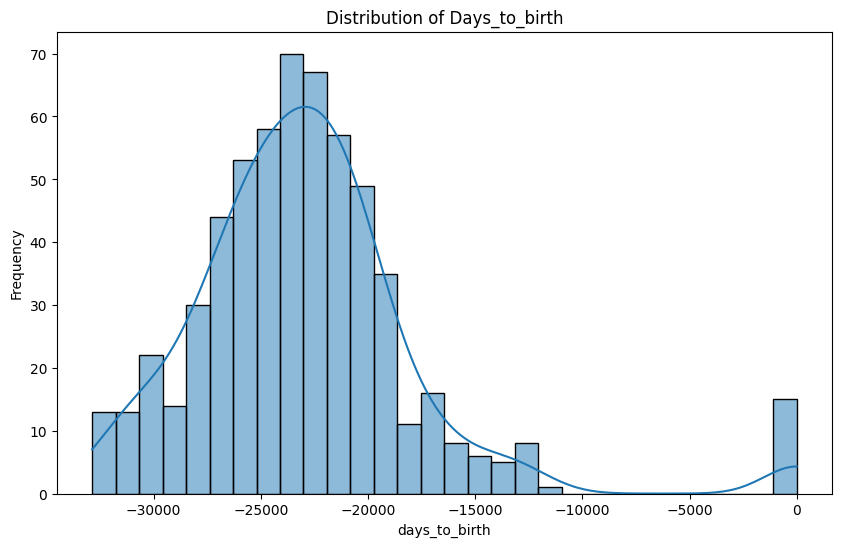

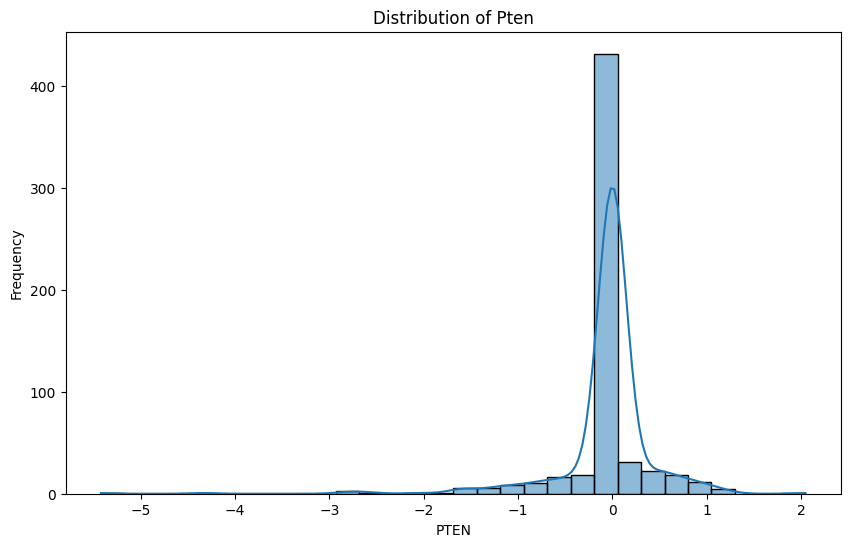

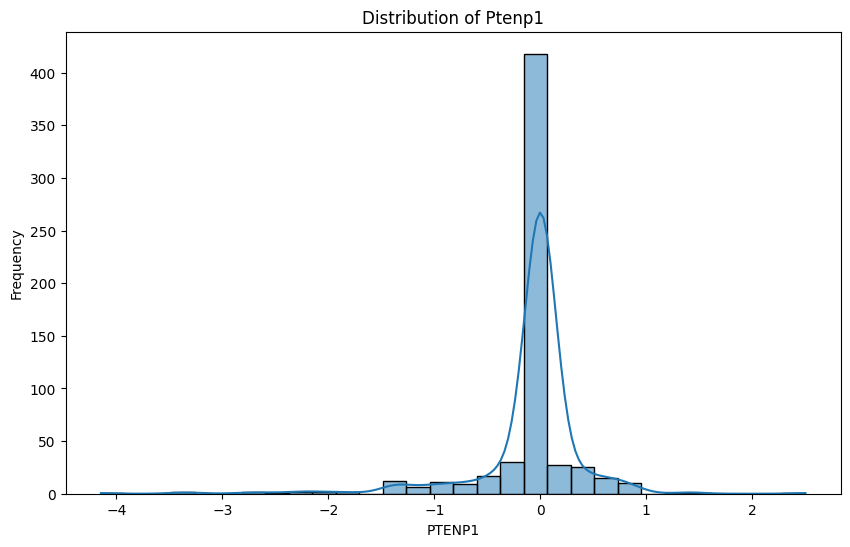

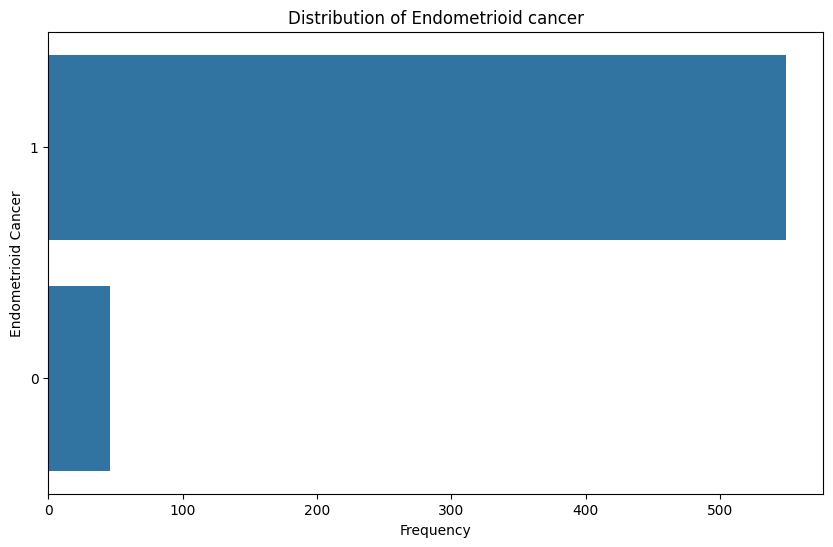

In [10]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [11]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Endometrioid Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,0,-1.175592,0.864474,-0.531035,0.426928,-0.601278,-1.67421,0.080406,-1.766546,-0.423399,...,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288,1
TCGA-4E-A92E-01,54,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012,1
TCGA-5B-A90C-01,69,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388,1
TCGA-5S-A9Q8-01,51,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988,1
TCGA-A5-A0G1-01,67,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


### 3. Do regression & Cross Validation

In [12]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1771/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.860348845420521


In [13]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For pten:
PTEN: Coefficient = 0.0012689717597176256, p-value = 0.9867039011081247
PTENP1: Coefficient = 0.0019095275935438068, p-value = 0.9775152126380775

For age:
age: Coefficient = 0.0049121647226721965, p-value = 0.6724738145968927
SAGE1: Coefficient = -0.0009229129667086616, p-value = 0.9886655021248894
MAGEH1: Coefficient = -0.0058338082088478255, p-value = 0.9632501145070465
GAGE1: Coefficient = -0.00043642209880730663, p-value = 0.9957828718405168
GAGE4: Coefficient = 0.0004318437916063624, p-value = 0.9959803646712775
GAGE2D: Coefficient = 0.0007009697357761263, p-value = 0.9937981968287879
GAGE2E: Coefficient = 0.0005247691713357069, p-value = 0.9946684123940656
GAGE2C: Coefficient = 0.0010816143401873577, p-value = 0.989996482087103
MAGED1: Coefficient = -0.002870495833880011, p-value = 0.9709215802808309
MAGED2: Coefficient = -0.0020838328068754556, p-value = 0.9820368827988575
MAGED4: Coefficient = -0.0027589526489933654, p-value = 0.9795862734923678


### 4. Discussion

In [14]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between PTEN gene and Endometrioid Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the PTEN gene and Endometrioid Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the PTEN gene and Endometrioid Cancer when considering the influence of age.




In [15]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: PTEN
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: PTENP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: SAGE1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: MAGEH1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE4
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2D
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2E
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2C
Coefficient is positive, and 

In [16]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: PTEN
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the PTEN gene and Endometrioid Cancer when considering the influence of age.

Variable: PTENP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the PTENP1 gene and Endometrioid Cancer when considering the influence of age.


